In [1]:
! pip install networkx
! pip install spacy

In [2]:
import networkx as nx 
import spacy
import pandas as pd
from collections import Counter
nlp = spacy.load("en_core_web_sm")
news_data = pd.read_csv('work\\fox_news.csv')


In [3]:
# Define the function to extract keywords
def extract_keywords(text):
    if isinstance(text, str):
        return text.split()
    return []

# Apply the function to the 'Corpus' column
news_data['keywords'] = news_data['Corpus'].apply(extract_keywords)

In [4]:
G = nx.Graph()

for idx, row in news_data.iterrows():
    author = row['author']
    category = row['category']
    keywords = row['keywords']
    
    # Add nodes
    G.add_node(author, type='author')
    G.add_node(category, type='category')
    
    G.add_edge(author, category, type='authorship')
    
    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(author, keyword, type='keyword_association')

    for keyword in keywords:
        G.add_edge(category, keyword, type='keyword_association')


['politics' 'sports' 'world' 'us' 'lifestyle' 'media' 'opinion'
 'technology' 'faith-values' 'health' 'travel' 'entertainment' 'markets'
 'weather-news' 'betting' 'food-drink' 'tech' 'personal-finance' 'economy'
 'extreme-weather']


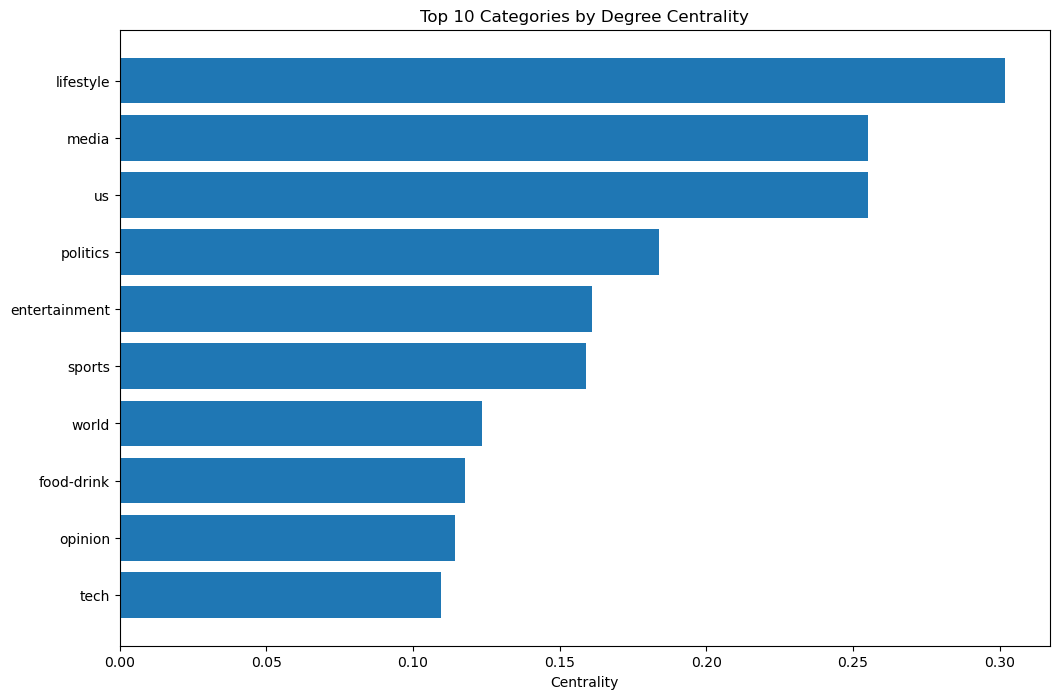

In [5]:
import matplotlib.pyplot as plt

# Define a function to plot centrality measures
def plot_centrality(centrality_dict, title):
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(centrality_dict)), list(centrality_dict.values()), align='center')
    plt.yticks(range(len(centrality_dict)), list(centrality_dict.keys()))
    plt.xlabel('Centrality')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Filter nodes to include only those of type 'category'
category_nodes = news_data['category'].unique()
print(category_nodes)

# Degree centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality_filtered = {node: centrality for node, centrality in degree_centrality.items() if node in category_nodes}
sorted_degree = dict(sorted(degree_centrality_filtered.items(), key=lambda x: x[1], reverse=True)[:10])
plot_centrality(sorted_degree, 'Top 10 Categories by Degree Centrality')

# # Betweenness centrality
# betweenness_centrality = nx.betweenness_centrality(G)
# betweenness_centrality_filtered = {node: centrality for node, centrality in betweenness_centrality.items() if node in category_nodes}
# sorted_betweenness = dict(sorted(betweenness_centrality_filtered.items(), key=lambda x: x[1], reverse=True)[:10])
# plot_centrality(sorted_betweenness, 'Top 10 Categories by Betweenness Centrality')

# # Closeness centrality
# closeness_centrality = nx.closeness_centrality(G)
# closeness_centrality_filtered = {node: centrality for node, centrality in closeness_centrality.items() if node in category_nodes}
# sorted_closeness = dict(sorted(closeness_centrality_filtered.items(), key=lambda x: x[1], reverse=True)[:10])
# plot_centrality(sorted_closeness, 'Top 10 Categories by Closeness Centrality')

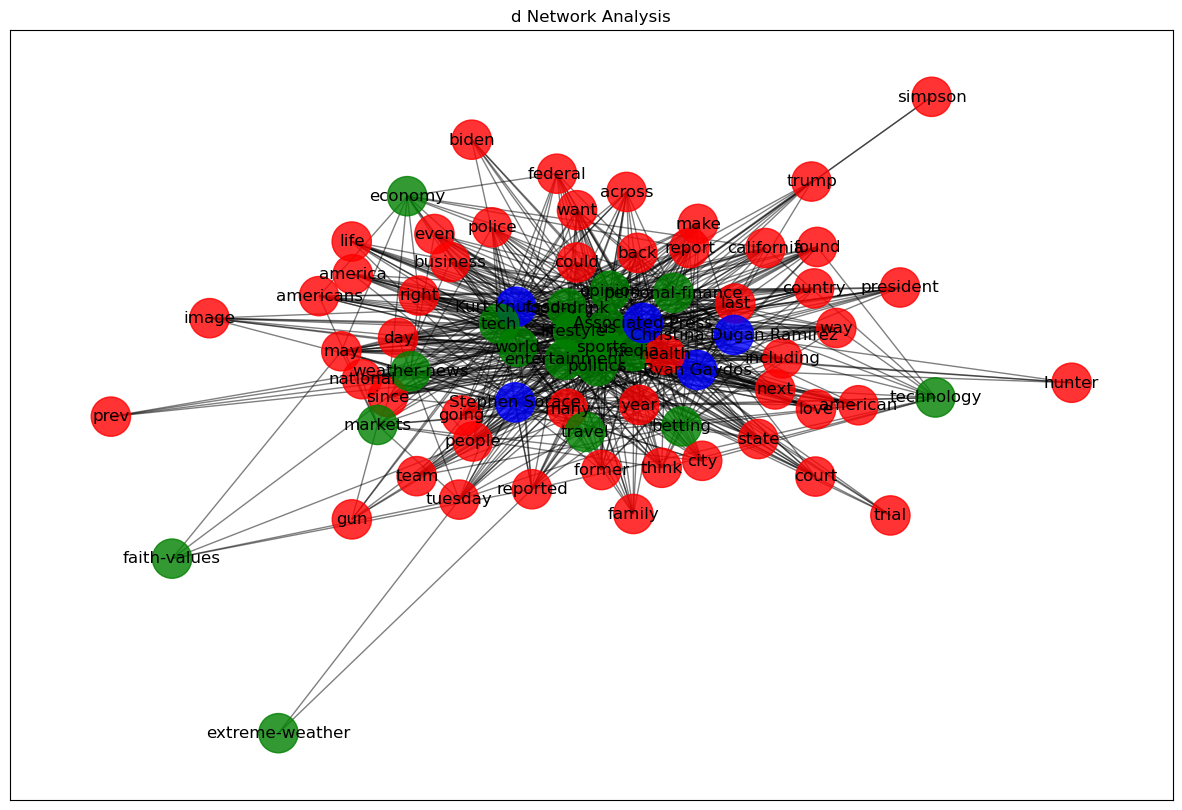

In [7]:
from collections import Counter

top_keywords = Counter([keyword for keywords in news_data['keywords'] for keyword in keywords]).most_common(50)
top_authors = Counter(news_data['author']).most_common(5)

top_keywords = [keyword for keyword, freq in top_keywords]
top_authors = [author for author, freq in top_authors]

G_filtered = nx.Graph()
for idx, row in news_data.iterrows():
    author = row['author']
    category = row['category']
    keywords = row['keywords']
    
    if author in top_authors:
        G_filtered.add_node(author, type='author', label=author)
    if category not in G_filtered.nodes:
        G_filtered.add_node(category, type='category', label=category)
    
    if author in top_authors:
        G_filtered.add_edge(author, category, type='authorship')
    
    for keyword in keywords:
        if keyword in top_keywords:
            G_filtered.add_node(keyword, type='keyword', label=keyword)
            if author in top_authors:
                G_filtered.add_edge(author, keyword, type='keyword_association')
            G_filtered.add_edge(category, keyword, type='keyword_association')

color_map_filtered = []
for node in G_filtered:
    if G_filtered.nodes[node]['type'] == 'author':
        color_map_filtered.append('blue')
    elif G_filtered.nodes[node]['type'] == 'category':
        color_map_filtered.append('green')
    else:  
        color_map_filtered.append('red')
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_filtered, k=0.5, iterations=50)  # positions for all nodes
nx.draw_networkx_nodes(G_filtered, pos, node_color=color_map_filtered, node_size=800, alpha=0.8)
nx.draw_networkx_edges(G_filtered, pos, alpha=0.5)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black')
plt.title('d Network Analysis')
plt.show()